<a href="https://colab.research.google.com/github/PabloPe4/Clustering_Bank/blob/main/Clustering_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmodes

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

In [3]:
path= '/content/bank-additional-full.csv'
delimiter = ';'
bank = pd.read_csv(path, header='infer', delimiter=delimiter)

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.shape

(41188, 21)

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank['age_bin'] = pd.cut(bank['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [8]:
bank_cols = bank[['job','age_bin','marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [9]:
bank_cols.head()

,job,age_bin,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,50-60,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,50-60,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,30-40,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,30-40,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,50-60,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [10]:
bank_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   age_bin      41188 non-null  category
 2   marital      41188 non-null  object  
 3   education    41188 non-null  object  
 4   default      41188 non-null  object  
 5   housing      41188 non-null  object  
 6   loan         41188 non-null  object  
 7   contact      41188 non-null  object  
 8   month        41188 non-null  object  
 9   day_of_week  41188 non-null  object  
 10  poutcome     41188 non-null  object  
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [11]:
#Categorizing the data
le = preprocessing.LabelEncoder()
bank_lab = bank_cols.apply(le.fit_transform)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
bank_lab.head()

,job,age_bin,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,4,1,0,0,0,0,1,6,1,1
1,7,4,1,3,1,0,0,1,6,1,1
2,7,2,1,3,0,2,0,1,6,1,1
3,0,2,1,1,0,0,0,1,6,1,1
4,7,4,1,3,0,0,2,1,6,1,1


In [12]:
#Export the categorized df to CSV if needed
#bank_lab.to_csv(r'/content/bank_lab.csv')

In [13]:
print(le_name_mapping)

{'failure': 0, 'nonexistent': 1, 'success': 2}


In [14]:
#The type of job they have
job_df = pd.DataFrame(bank_lab['job'].value_counts())
job_df.sort_values(by='job', ascending=False)

,job
0,10422
1,9254
9,6743
7,3969
4,2924
5,1720
2,1456
6,1421
3,1060
10,1014


In [15]:
#The tange of age they are
age_df = pd.DataFrame(bank_lab['age_bin'].value_counts())
age_df.sort_values(by='age_bin', ascending=False)

,age_bin
2,16385
3,10240
1,7243
4,6270
5,488
6,303
0,140
7,109
8,10


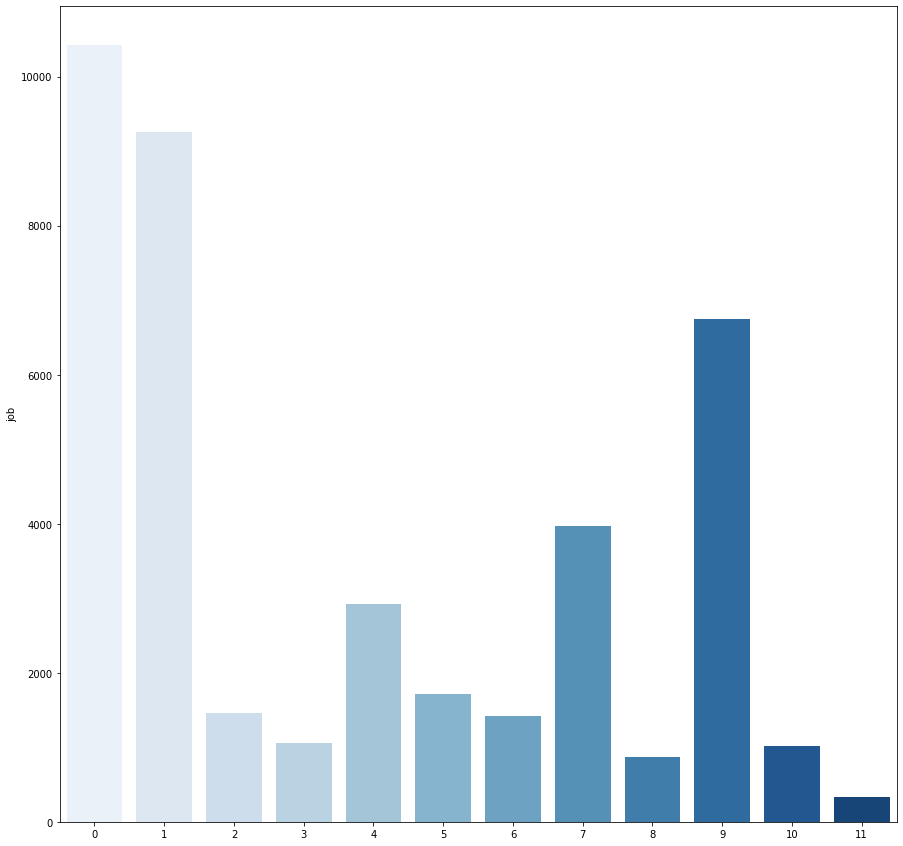

In [16]:
plt.figure(figsize=(15, 15))
ax=sns.barplot(x=job_df.index, y=job_df['job'], palette='Blues')
plt.show()

In [17]:
age_df = pd.DataFrame(bank_lab['age_bin'].value_counts())
age_df.head()

,age_bin
2,16385
3,10240
1,7243
4,6270
5,488


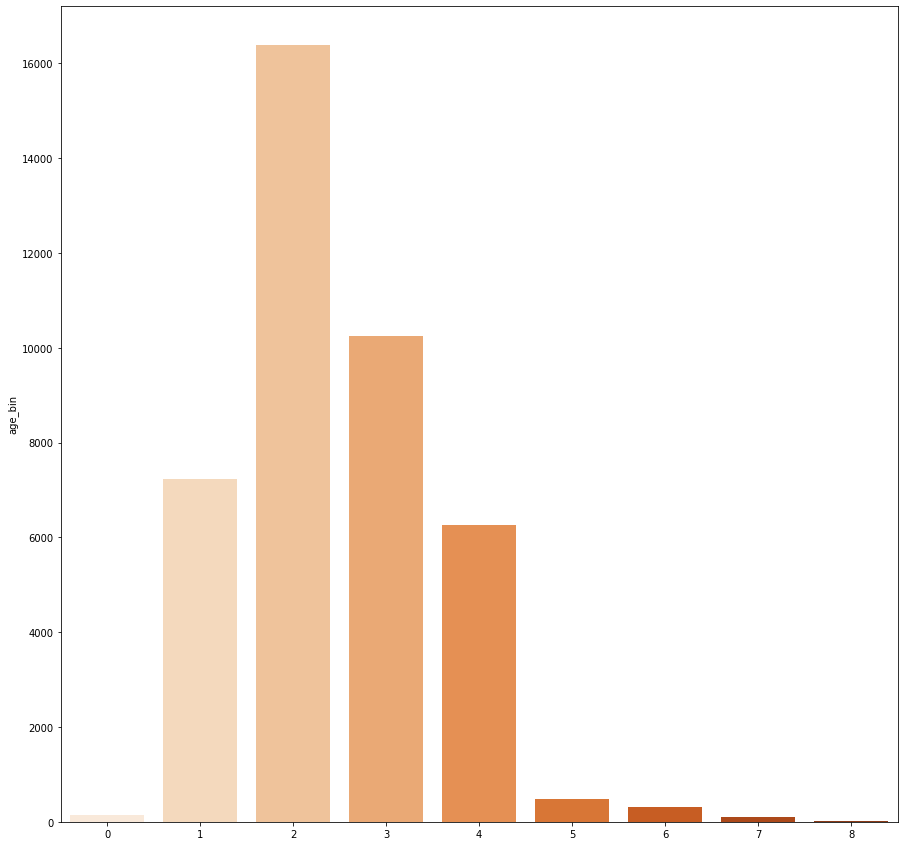

In [18]:
plt.figure(figsize=(15, 15))
ax=sns.barplot(x=age_df.index, y=age_df['age_bin'], palette='Oranges')
plt.show()

In [19]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 4, verbose=1)
    kmode.fit_predict(bank_lab)
    cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


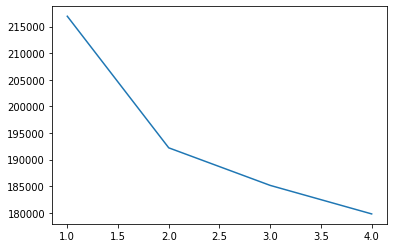

In [20]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost);

In [21]:
fit_clusters = kmode.fit_predict(bank_lab)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


In [22]:
fit_clusters

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [23]:
bank_lab = bank_lab.reset_index()
clusters_df = pd.DataFrame(fit_clusters)
clusters_df.columns = ['cluster_predicted']

lab_df = pd.concat([bank_lab, clusters_df], axis = 1).reset_index()
bank_df = pd.concat([bank, clusters_df], axis = 1).reset_index()
lab_df = lab_df.drop(['index', 'level_0'], axis = 1)
bank_df = bank_df.drop(['index'], axis = 1)

In [24]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cluster_predicted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,1


In [25]:
bank_df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [26]:
bank_df['age_bin'].unique()

['50-60', '30-40', '40-50', '20-30', '0-20', '60-70', '70-80', '80-90', '90-100']
Categories (9, object): ['0-20' < '20-30' < '30-40' < '40-50' ... '60-70' < '70-80' < '80-90' < '90-100']

In [27]:
#We are interested in say unemployed people in the range of 40-50 years old
query_1 = bank_df.query('job=="unemployed" & age_bin=="40-50"')
query_1_df = query_1

In [28]:
query_1_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cluster_predicted
140,43,unemployed,single,university.degree,no,yes,no,telephone,may,mon,240,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,0
355,43,unemployed,single,university.degree,no,no,no,telephone,may,mon,404,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1
403,43,unemployed,married,university.degree,unknown,yes,no,telephone,may,tue,424,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,0
457,48,unemployed,single,basic.4y,no,yes,no,telephone,may,tue,112,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1
491,41,unemployed,married,basic.9y,unknown,no,no,telephone,may,tue,111,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1


In [29]:
query_1_df.shape

(285, 23)

In [30]:
# Data for Cluster1
cluster1 = bank_df[bank_df.cluster_predicted==1]

In [31]:
#Export the cluster1 df to CSV
cluster1.to_csv(r'/content/cluster1.csv')

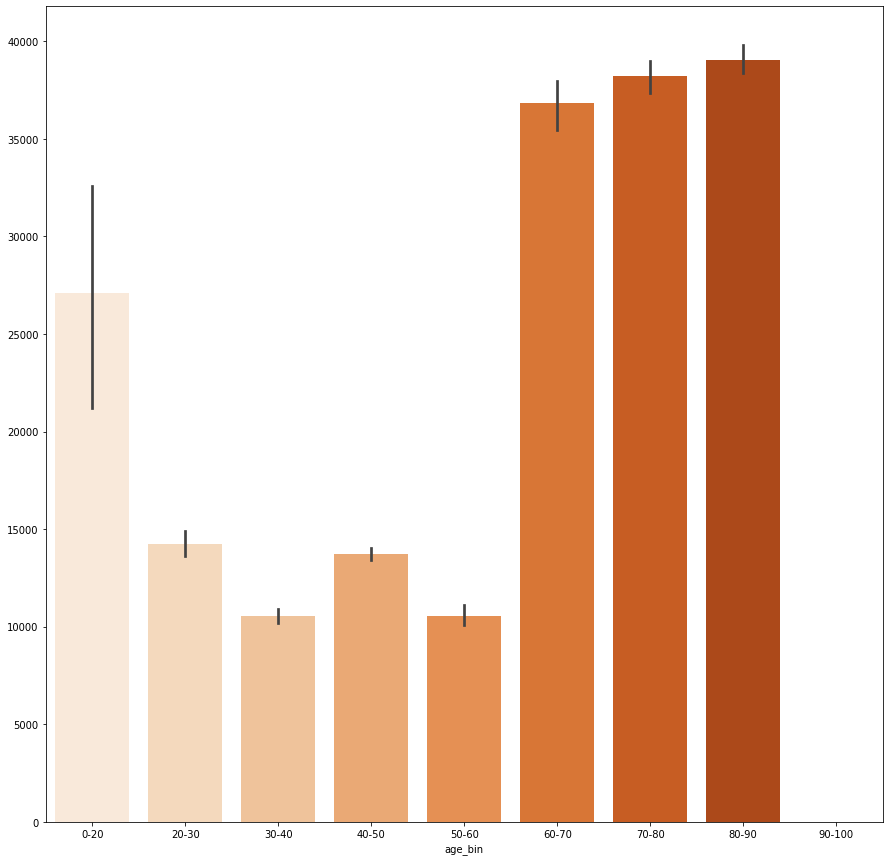

In [32]:
plt.figure(figsize=(15, 15))
ax=sns.barplot(x=cluster1['age_bin'], y=cluster1.index, palette='Oranges')
plt.show()

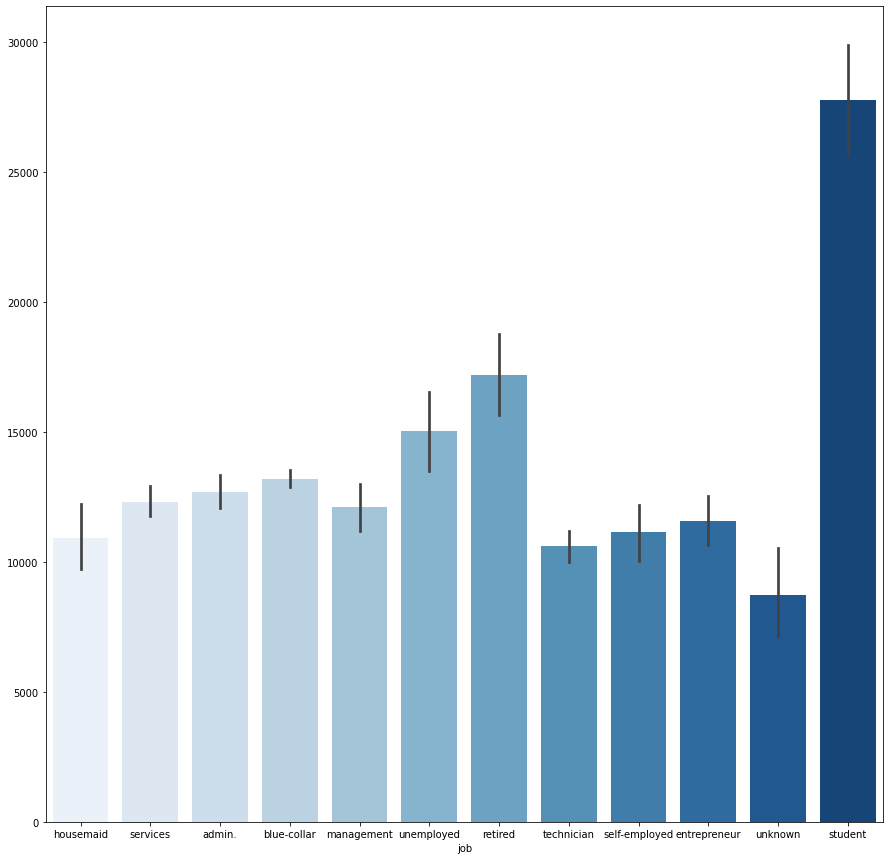

In [33]:
plt.figure(figsize=(15, 15))
ax=sns.barplot(x=cluster1['job'], y=cluster1.index, palette='Blues')
plt.show()

In [34]:
query_cluster1 = cluster1.query('job=="unemployed" & age_bin=="40-50"')
query_cluster1_df = query_cluster1
query_cluster1_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cluster_predicted
355,43,unemployed,single,university.degree,no,no,no,telephone,may,mon,404,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1
457,48,unemployed,single,basic.4y,no,yes,no,telephone,may,tue,112,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1
491,41,unemployed,married,basic.9y,unknown,no,no,telephone,may,tue,111,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1
569,43,unemployed,married,university.degree,unknown,unknown,unknown,telephone,may,tue,87,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1
738,47,unemployed,divorced,university.degree,no,no,no,telephone,may,tue,303,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,1


In [35]:
query_cluster1_df.shape

(136, 23)

In [36]:
#Export the query to CSV if needed
#query_cluster1_df.to_csv(r'/content/query_cluster1.csv')

In [37]:
# Data for Cluster0
cluster0 = bank_df[bank_df.cluster_predicted==0]

In [38]:
#Export the cluster0 df to CSV
cluster0.to_csv(r'/content/cluster0.csv')

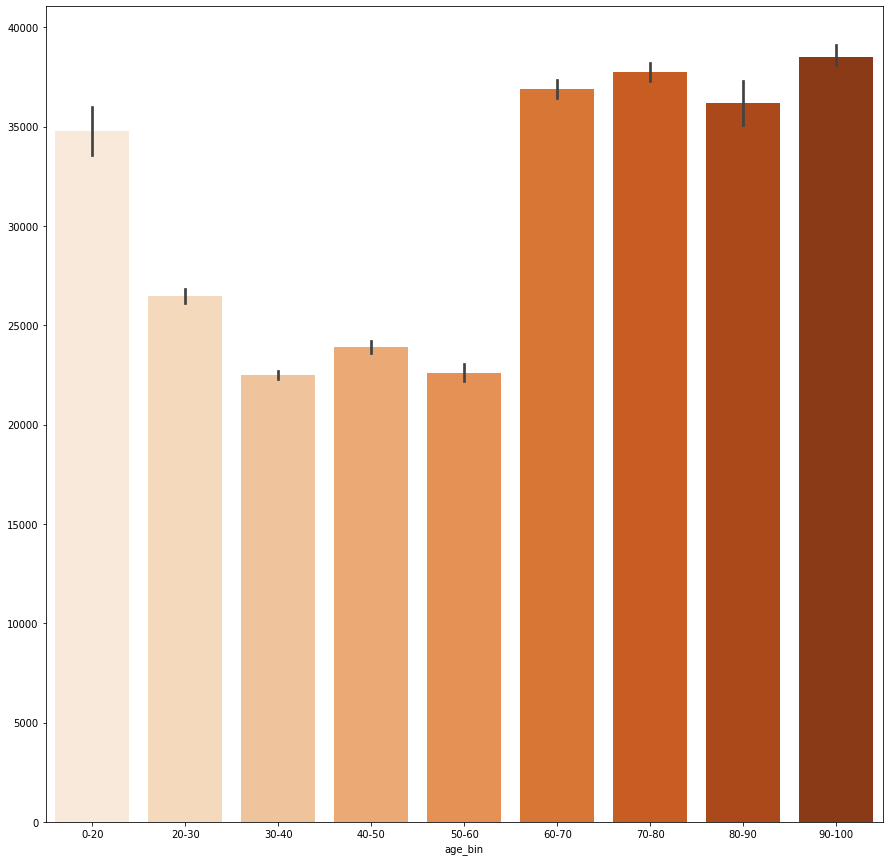

In [39]:
plt.figure(figsize=(15,15))
ax=sns.barplot(x=cluster0['age_bin'], y=cluster0.index, palette='Oranges')
plt.show()

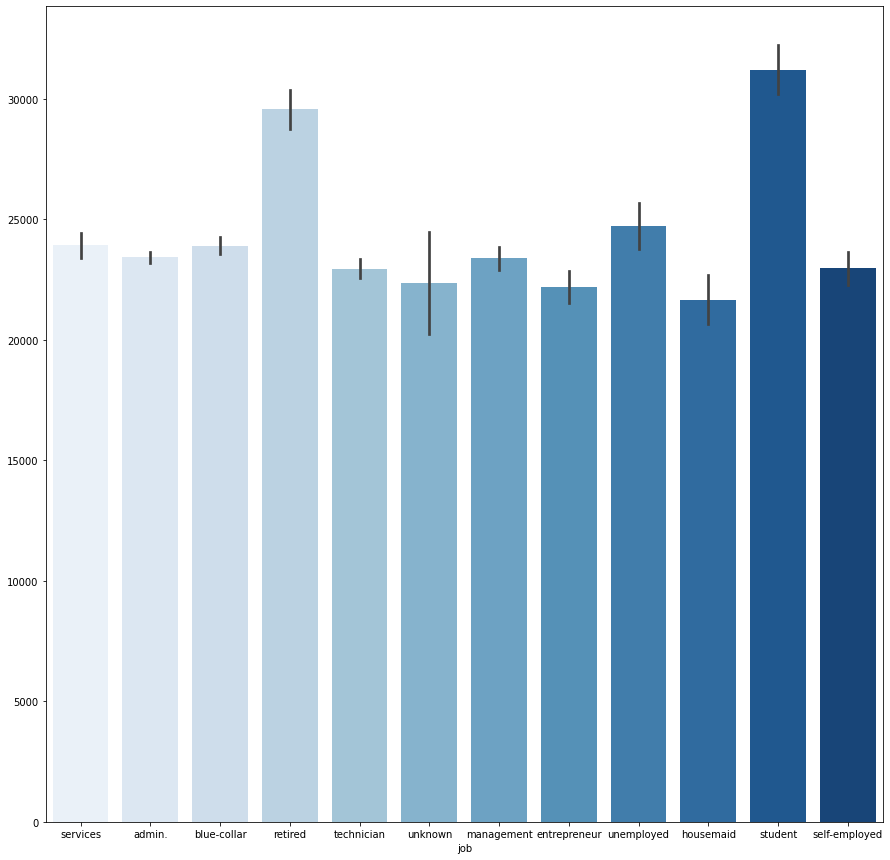

In [40]:
plt.figure(figsize=(15, 15))
ax=sns.barplot(x=cluster0['job'], y=cluster0.index, palette='Blues')
plt.show()

In [41]:
query_cluster0 = cluster0.query('job=="unemployed" & age_bin=="40-50"')
query_cluster0_df = query_cluster0
query_cluster0_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cluster_predicted
140,43,unemployed,single,university.degree,no,yes,no,telephone,may,mon,240,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,0
403,43,unemployed,married,university.degree,unknown,yes,no,telephone,may,tue,424,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,0
1213,48,unemployed,married,basic.4y,no,yes,yes,telephone,may,thu,56,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,40-50,0
1417,43,unemployed,married,basic.9y,no,yes,no,telephone,may,thu,305,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,40-50,0
1534,49,unemployed,married,university.degree,no,yes,yes,telephone,may,thu,272,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,40-50,0


In [42]:
query_cluster0_df.shape

(104, 23)

In [43]:
#Export the query to CSV if needed
#query_cluster0_df.to_csv(r'/content/query_cluster0.csv')